# Tanh vs. Sigmoid: Comparison of Performance and Effects on Gradient Descent

This is the accompanying code to my article on medium discussing the differences between tanh and sigmoid activation functions as well as the necessity of normalization in neural networks: **LINK**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
sns.set(style='darkgrid')

Create some artificial training data

In [41]:
X = np.random.random((100,50)) - 0.5 # Random value between -0.5 and +0.5
Y = np.where(X.mean(axis=1) > 0, 1, 0).reshape(100,1) # 1 if X[i] > 0; 0 otherwise

Helper function to initialize simple neural network with one hidden layer consisting of 4 nodes.

In [43]:
def initialize_model(activation, learning_rate):
    '''Initialize simple network with one hidden layer'''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_shape=(50,), activation=activation),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(lr=learning_rate), 
                  loss='binary_crossentropy')
    
    return model

## Compare Performance of Sigmoid and Tanh Models

In [44]:
sigmoid_model = initialize_model('sigmoid', 0.1)
tanh_model = initialize_model('tanh', 0.1)

In [45]:
sigmoid_res = sigmoid_model.fit(X, Y, epochs=50, verbose=0)
print("Last loss of sigmoid model:", sigmoid_res.history['loss'][-1])

Last loss of sigmoid model: 0.6517548370361328


In [46]:
tanh_res = tanh_model.fit(X, Y, epochs=50, verbose=0)
print("Last loss of tanh model:", tanh_res.history['loss'][-1])

Last loss of tanh model: 0.22077681362628937


Is the performance difference only due to the fact that the gradient of tanh is larger than the one of sigmoid? Try out various learning rates and compare the loss after a few epochs of training.

In [52]:
final_loss = {'tanh': [], 'sigmoid':[]}
n_epochs = 10

learning_rates = np.arange(0.1,8,0.3)
for learning_rate in learning_rates:    
    sigmoid_model = initialize_model('sigmoid', learning_rate)
    tanh_model = initialize_model('tanh', learning_rate)
    
    sigmoid_res = sigmoid_model.fit(X, Y, epochs=n_epochs, verbose=0)
    final_loss['sigmoid'].append(sigmoid_res.history['loss'][-1])
    
    tanh_res = tanh_model.fit(X, Y, epochs=n_epochs, verbose=0)
    final_loss['tanh'].append(tanh_res.history['loss'][-1])


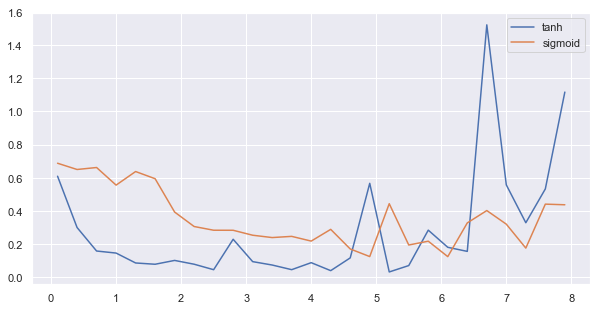

In [53]:
final_loss_df = pd.DataFrame(final_loss, index=learning_rates)
final_loss_df.plot(figsize=(10,5))

## Plot Weights in Output Layers
Define Callback that stores the weights of the output layer after each batch.

In [32]:
weights_list = []

class OutputLayerWeightsSaver(tf.keras.callbacks.Callback):
    
    def on_batch_end(self, batch, logs={}):
        weights, biases = self.model.layers[-1].get_weights()
        weights_list.append(weights.flatten())


### Sigmoid Network
Initialize sigmoid model with a relatively large learning rate of 1, so we can better see the effects of each weight update in the plot.

In [33]:
sigmoid_model = initialize_model('sigmoid', 1)

Fit the model with a batch size of 1. A batch size of 1 ensures that our callback stores the weights after each individual step of gradient descent. If we pick a larger batch size, the gradients resulting from all training examples in the batch will be averaged.

In [34]:
sigmoid_model.fit(X, Y, epochs=1, batch_size=1, callbacks=[OutputLayerWeightsSaver()])

Epoch 1/1
100/100 [==============================] - 0s 5ms/step - loss: 0.7407


Plot the weights.

In [35]:
output_weights_sigmoid = pd.DataFrame(weights_list)
output_weights_sigmoid.index.name = 'step'

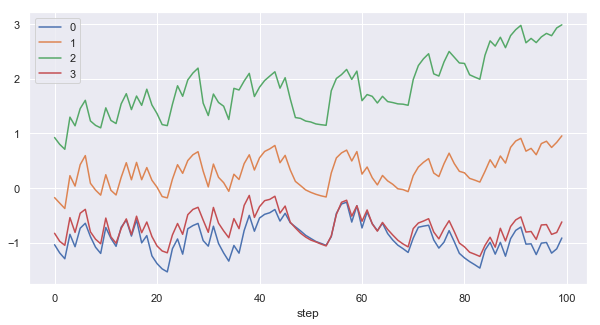

In [36]:
output_weights_sigmoid.plot(figsize=(10,5))

### Tanh Network
Reset `weights_list` and initialize tanh model.

In [37]:
weights_list = []
tanh_model = initialize_model('tanh', 1)

In [38]:
tanh_model.fit(X, Y, epochs=1, batch_size=1, callbacks=[OutputLayerWeightsSaver()])

Epoch 1/1
100/100 [==============================] - 0s 4ms/step - loss: 0.7875


Plot the weights.

In [39]:
output_weights_tanh = pd.DataFrame(weights_list)
output_weights_tanh.index.name = 'step'

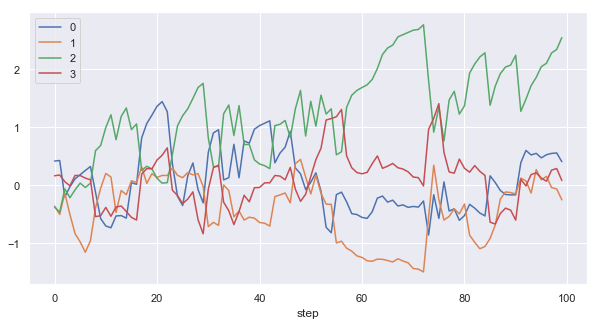

In [40]:
output_weights_tanh.plot(figsize=(10,5))